# United Kingdom road accident data analysis

## Introduction

# Data preparation

## Importing libraries

In [1]:
#import esFunctions as es

In [2]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 50)

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import axes



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix             
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings("ignore")

## Data characterisation

In [3]:
UK_Accident = pd.read_csv("UK_Accident.csv")

In [4]:
UK_Accident

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,Dual carriageway,70,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,Single carriageway,40,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,Single carriageway,60,Giveway or uncontrolled,5,43,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
UK_Accident.shape

(1504150, 33)

In [6]:
UK_Accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

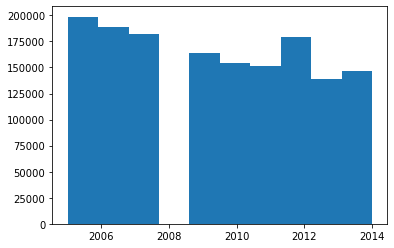

In [7]:
plt.hist(UK_Accident["Year"])
plt.show()

## Data cleaning

In [8]:
UK_Accident = UK_Accident.loc[UK_Accident["Year"] >= 2009]

In [9]:
UK_A = UK_Accident.drop(columns =["Unnamed: 0", "Accident_Index", "LSOA_of_Accident_Location", "Year", "Local_Authority_(Highway)", "1st_Road_Class", "1st_Road_Number", "2nd_Road_Class", "2nd_Road_Number", "Local_Authority_(District)"])

In [10]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,524910.0,180800.0,-0.201349,51.512273,1,2,2,1,01/01/2009,5,15:11,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570012,525050.0,181040.0,-0.199248,51.514399,1,2,2,11,05/01/2009,2,10:59,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes
570013,526490.0,177990.0,-0.179599,51.486668,1,3,2,1,04/01/2009,1,14:19,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570014,524800.0,180300.0,-0.203110,51.507804,1,2,2,1,05/01/2009,2,08:10,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes
570015,526930.0,177490.0,-0.173445,51.482076,1,2,2,1,06/01/2009,3,17:25,Single carriageway,30,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [11]:
UK_A.shape

(934139, 23)

In [12]:
UK_A.isnull().sum()

Location_Easting_OSGR                           0
Location_Northing_OSGR                          0
Longitude                                       0
Latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                           50
Road_Type                                       0
Speed_limit                                     0
Junction_Control                                0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                         0
Special_Conditions_at_Site                      0


In [13]:
UK_A = UK_A.dropna(axis=0)

In [14]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,524910.0,180800.0,-0.201349,51.512273,1,2,2,1,01/01/2009,5,15:11,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570012,525050.0,181040.0,-0.199248,51.514399,1,2,2,11,05/01/2009,2,10:59,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes
570013,526490.0,177990.0,-0.179599,51.486668,1,3,2,1,04/01/2009,1,14:19,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570014,524800.0,180300.0,-0.203110,51.507804,1,2,2,1,05/01/2009,2,08:10,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes
570015,526930.0,177490.0,-0.173445,51.482076,1,2,2,1,06/01/2009,3,17:25,Single carriageway,30,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [15]:
#import pandas_profiling as pp
#pp.ProfileReport(UK_A)

## Data visualisation

[Text(0.5, 0, 'Days of the Week'),
 Text(0.5, 1.0, 'Accidents per day of the week')]

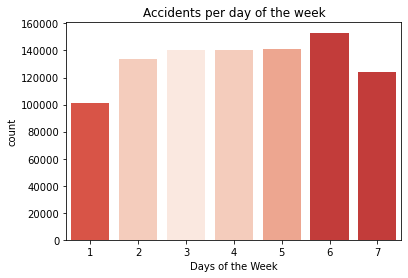

In [16]:
dev_color= UK_A.Day_of_Week.argsort().argsort()
pal= sns.color_palette('Reds', len(dev_color))
p = sns.countplot(x="Day_of_Week", 
              data=UK_A,
              palette=np.array(pal[::])[dev_color]) 
p.set(xlabel='Days of the Week', title= "Accidents per day of the week")


In [17]:
A = UK_A.assign(Area =pd.cut(UK_A['Urban_or_Rural_Area'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Urban', 'Rural', 'Unknow']),
               Severity =pd.cut(UK_A['Accident_Severity'], 
                               bins=[0, 1.5, 2.5, 9999], 
                               labels=['Fatal', 'Serious', 'Slight']) )

In [18]:
#from plotnine import ggplot, aes, geom_point, scale_colour_brewer, labs
#(
#ggplot(A)
#+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Area")
#+ geom_point()
#+ scale_colour_brewer(  type = "qual", palette = 6)
#+ labs(title ="Distribution of the UK road accidents by area",x = "Location Easting OSGR", y = "Location Northing OSGR")
#)

In [19]:
#(
#ggplot(A)
#+ aes(x="Location_Easting_OSGR",y="Location_Northing_OSGR",colour= "Severity")
#+ geom_point()
#+ scale_colour_brewer(  type = "qual", palette = 6)
#+ labs(title ="Distribution of the UK road accidents by severity",x = "Location Easting OSGR", y = "Location Northing OSGR")
#)

## Feature engineering


In [20]:
UK_A.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,524910.0,180800.0,-0.201349,51.512273,1,2,2,1,01/01/2009,5,15:11,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570012,525050.0,181040.0,-0.199248,51.514399,1,2,2,11,05/01/2009,2,10:59,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes
570013,526490.0,177990.0,-0.179599,51.486668,1,3,2,1,04/01/2009,1,14:19,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570014,524800.0,180300.0,-0.203110,51.507804,1,2,2,1,05/01/2009,2,08:10,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes
570015,526930.0,177490.0,-0.173445,51.482076,1,2,2,1,06/01/2009,3,17:25,Single carriageway,30,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [21]:
UK_A = UK_A.drop(["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude", "Latitude", "Time"], axis=1)

In [22]:
UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,1,2,2,1,01/01/2009,5,One way street,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570012,1,2,2,11,05/01/2009,2,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes
570013,1,3,2,1,04/01/2009,1,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570014,1,2,2,1,05/01/2009,2,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes
570015,1,2,2,1,06/01/2009,3,Single carriageway,30,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [25]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder( handle_unknown='error', sparse=True)

In [26]:
#encoder_df = pd.DataFrame(encoder.fit_transform(UK_A[["Weather_Conditions"]]).toarray())

In [27]:
#final_df = UK_A.join(encoder_df)
#encoder_df.shape

In [28]:
#final_df.shape

In [29]:
#final_df.isnull().sum()

https://towardsdatascience.com/label-encoder-and-onehot-encoder-in-python-83d32288b592

In [23]:
UK_A['Speed_limit'].unique()

array([30, 20, 50, 40, 70, 60, 10, 15], dtype=int64)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
UK_A['Speed_limit'] = le.fit_transform(UK_A['Speed_limit'])

UK_A.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
570011,1,2,2,1,01/01/2009,5,One way street,3,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570012,1,2,2,11,05/01/2009,2,Single carriageway,3,Giveway or uncontrolled,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes
570013,1,3,2,1,04/01/2009,1,Single carriageway,3,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes
570014,1,2,2,1,05/01/2009,2,Single carriageway,3,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Other,Frost/Ice,None,None,1,Yes
570015,1,2,2,1,06/01/2009,3,Single carriageway,3,Automatic traffic signal,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes


In [25]:
UK_A['Junction_Control'].unique()

array(['Giveway or uncontrolled', 'Automatic traffic signal', 'None',
       'Authorised person', 'Stop Sign'], dtype=object)

In [26]:
UK_A['Road_Type'].unique()

array(['One way street', 'Single carriageway', 'Dual carriageway',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [27]:
data = pd.get_dummies (UK_A, columns=['Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
                                     'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions',
                                     'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                     'Did_Police_Officer_Attend_Scene_of_Accident'], drop_first= True )
data

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_None,Junction_Control_Stop Sign,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,...,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident_Yes
570011,1,2,2,1,01/01/2009,5,3,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
570012,1,2,2,11,05/01/2009,2,3,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
570013,1,3,2,1,04/01/2009,1,3,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
570014,1,2,2,1,05/01/2009,2,3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
570015,1,2,2,1,06/01/2009,3,3,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,98,2,2,1,07/12/2014,1,7,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504146,98,3,2,2,11/12/2014,5,7,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504147,98,3,1,1,09/12/2014,3,4,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1504148,98,2,3,2,17/12/2014,4,6,2,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


https://medium.com/analytics-vidhya/categorical-encoding-with-pandas-get-dummies-d6f1ae6a3e06

In [44]:
df_ts = data.loc[:, ["Date", 'Number_of_Casualties', "Speed_limit"]]
df_ts

,Date,Number_of_Casualties,Speed_limit
570011,01/01/2009,1,3
570012,05/01/2009,11,3
570013,04/01/2009,1,3
570014,05/01/2009,1,3
570015,06/01/2009,1,3
...,...,...,...
1504145,07/12/2014,1,7
1504146,11/12/2014,2,7
1504147,09/12/2014,1,4
1504148,17/12/2014,2,6


In [46]:
ts = df_ts.groupby(by=['Date',"Speed_limit"]).agg({'Number_of_Casualties': 'sum',}).reset_index()
ts

,Date,Speed_limit,Number_of_Casualties
0,01/01/2009,2,8
1,01/01/2009,3,213
2,01/01/2009,4,34
3,01/01/2009,5,12
4,01/01/2009,6,56
...,...,...,...
13120,31/12/2014,3,190
13121,31/12/2014,4,24
13122,31/12/2014,5,17
13123,31/12/2014,6,57


## Data scaling

In [35]:
X = data.drop(columns = "Date", )
y = data["Date"]

In [36]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [37]:
X_scaled

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Junction_Control_Automatic traffic signal,Junction_Control_Giveway or uncontrolled,Junction_Control_None,Junction_Control_Stop Sign,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,...,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks,Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured),Did_Police_Officer_Attend_Scene_of_Accident_Yes
570011,0.0,0.5,0.015152,0.000000,0.666667,0.428571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570012,0.0,0.5,0.015152,0.108696,0.166667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570013,0.0,1.0,0.015152,0.000000,0.000000,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570014,0.0,0.5,0.015152,0.000000,0.166667,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570015,0.0,0.5,0.015152,0.000000,0.333333,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,1.0,0.5,0.015152,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1504146,1.0,1.0,0.015152,0.010870,0.666667,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1504147,1.0,1.0,0.000000,0.000000,0.333333,0.571429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

# Time series analysis

## Simple Exponential Smoothing

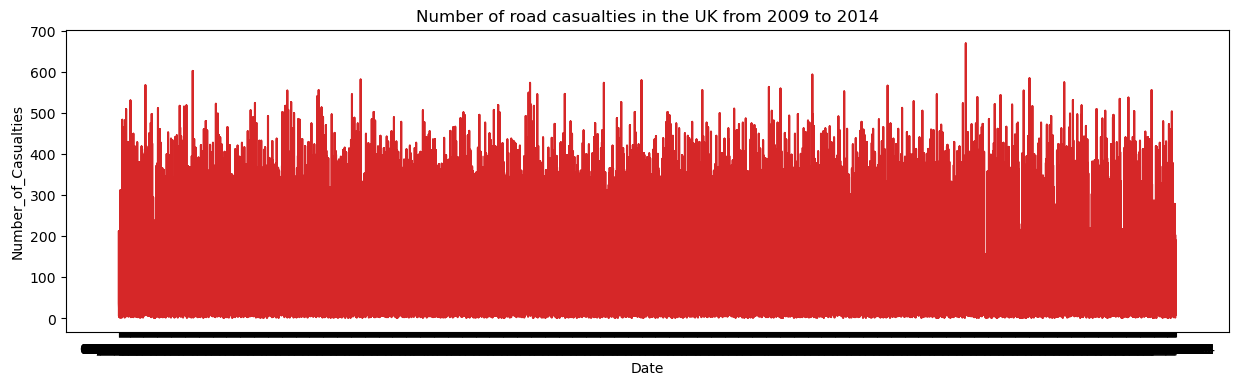

In [47]:
def plot_df(ts, x, y, title="", xlabel="Date", ylabel="Number_of_Casualties", dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(ts, x=ts["Date"], y=ts["Number_of_Casualties"], title='Number of road casualties in the UK from 2009 to 2014')

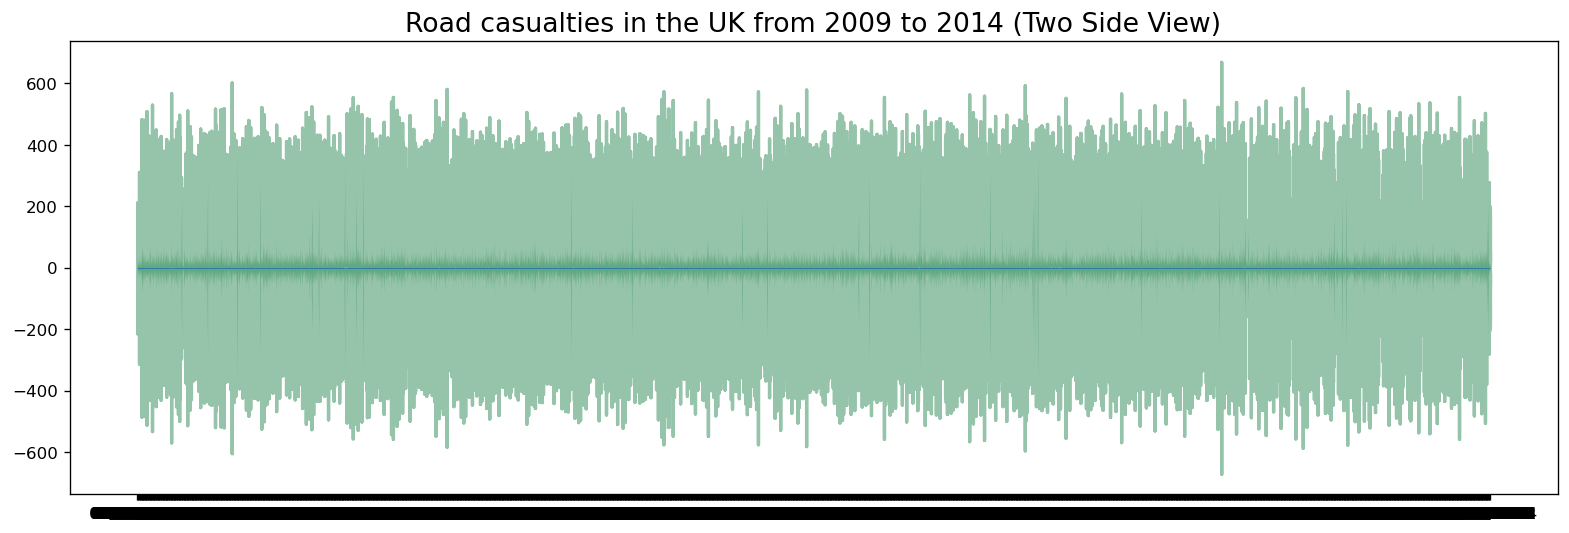

In [48]:
x = ts["Date"].values
y1 = ts["Number_of_Casualties"].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Road casualties in the UK from 2009 to 2014 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_ts["Date"]), xmax=np.max(df_ts["Date"]), linewidth=.5)
plt.show()

In [49]:
values = y1
 
# getting the count to split the dataset into 3
parts = int(len(values)/3)
 
# splitting the data into three parts
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]
 
# calculating the mean of the separated three
# parts of data individually.
mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
 
# calculating the variance of the separated
# three parts of data individually.
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()
 
# printing the mean of three groups
print('mean1=%f, mean2=%f, mean2=%f' % (mean_1, mean_2, mean_3))
 
# printing the variance of three groups
print('variance1=%f, variance2=%f, variance2=%f' % (var_1, var_2, var_3))

mean1=96.305371, mean2=96.519314, mean2=93.983771
variance1=15365.395205, variance2=15307.595913, variance2=14599.600422


https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/

In [57]:
# Prepare data
speed = ts["Speed_limit"].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(speed), replace=False)

# Draw Plot
plt.figure(figsize=(10,12), dpi= 80)
for i, y in enumerate(speed):
    if i > 0:        
        plt.plot('Date', "Number_of_Casualties", data=ts.loc[ts.Speed_limit==y, :], color=mycolors[i], label=y)
        plt.text(ts.loc[ts.Speed_limit==y, :].shape[0]-.9, ts.loc[ts.Speed_limit==y, "Number_of_Casualties"][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Number of Casualties$', xlabel='$Date$')
plt.yticks(fontsize=12, alpha=.7)
plt.xticks([01/01/2009, 01/01/2010, 01/01/2011, 01/01/2012, 01/01/2013, 01/01/2014, 01/01/2015])
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1251299808.py, line 18)

# Regression analysis

## Linear Discriminant Analysis

# Results and Discussion

# Conclusion

# References